##Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 
import networkx as nx
from scipy.optimize import curve_fit

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Exercise 1

##1.2: Cavity parameter

Text(40, 0, 'h =0.33\nβ = 0.5\n$P^2_{(σ_1 = +1)} = $0.5')

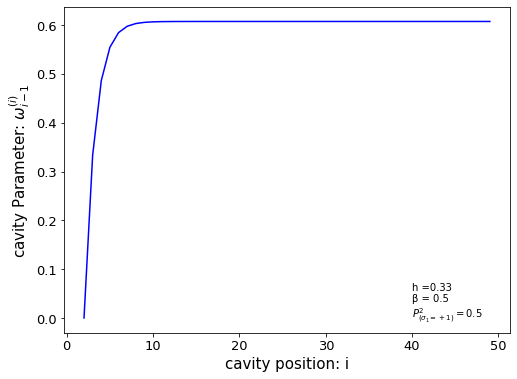

In [ ]:
N = 50
beta = 1/2
h = 1/3
P2_1_pos = 1/2
w2_1 =( 1/(2 * beta) )* np.log(P2_1_pos/(1 - P2_1_pos))

def w_i(i):                                                                     #This is the recursive function that is derived in the report(equation 3).
  if i == 2:
    return w2_1
  else:
    w_i_1 = w_i(i-1)
    list_w_i.append(w_i_1)
    wi = h + (1 / (2* beta) )* np.log ( (np.exp(2 * beta + 2 * beta * w_i_1) + 1)/(np.exp(2 * beta * w_i_1) + np.exp(2 * beta) ) ) 
    
    return wi

list_w_i = []
w_i(N)
list_i = np.array(list(range(2,N)))

fig, ax = plt.subplots(1,1 , figsize=(8,6))

ax.plot(list_i , list_w_i , c='blue')
ax.set_xlabel('cavity position: i')
ax.set_ylabel('cavity Parameter: $\u03C9^{(i)}_{i-1}$')
ax.text(40,0,"h ="+str(round(h,2))+"\n\u03B2 = "+str(beta)+"\n$P^2_{(\u03C3_1 = +1)} = $"+str(P2_1_pos))


##1.3: Cavity parameters with different initiations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


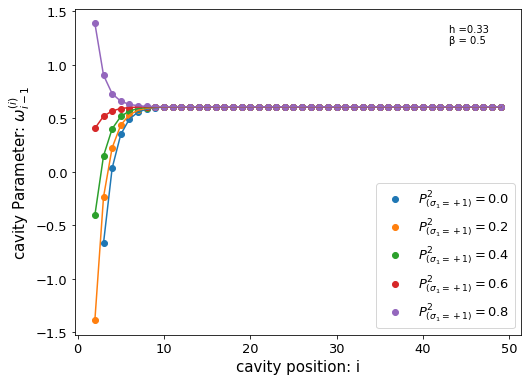

In [ ]:
P2_1_list = np.arange(0 , 1 , 0.2)
list_i = np.array(list(range(2,N)))
fig, ax = plt.subplots(1,1 , figsize=(8,6))

for P2_1_pos in P2_1_list:
  w2_1 = 1/(2 * beta) * np.log(P2_1_pos/(1 - P2_1_pos))
  list_w_i = []
  w_i(N)
  ax.scatter(list_i , list_w_i, label = '$P^2_{(\u03C3_1 = +1)} =$'+str(round(P2_1_pos,2)))
  ax.plot(list_i , list_w_i)#, label = '$P^2_{(\u03C3_1 = +1)} =$'+str(round(P2_1_pos,2)))

ax.set_xlabel('cavity position: i')
ax.set_ylabel('cavity Parameter: $\u03C9^{(i)}_{i-1}$')
ax.text(43,1.2,"h ="+str(round(h,2))+"\n\u03B2 = "+str(beta))
ax.legend(loc = 'lower right')

##1.4: Mean magnetization at thermodynamic limit

Text(1.5, 0.5, 'h = 1')

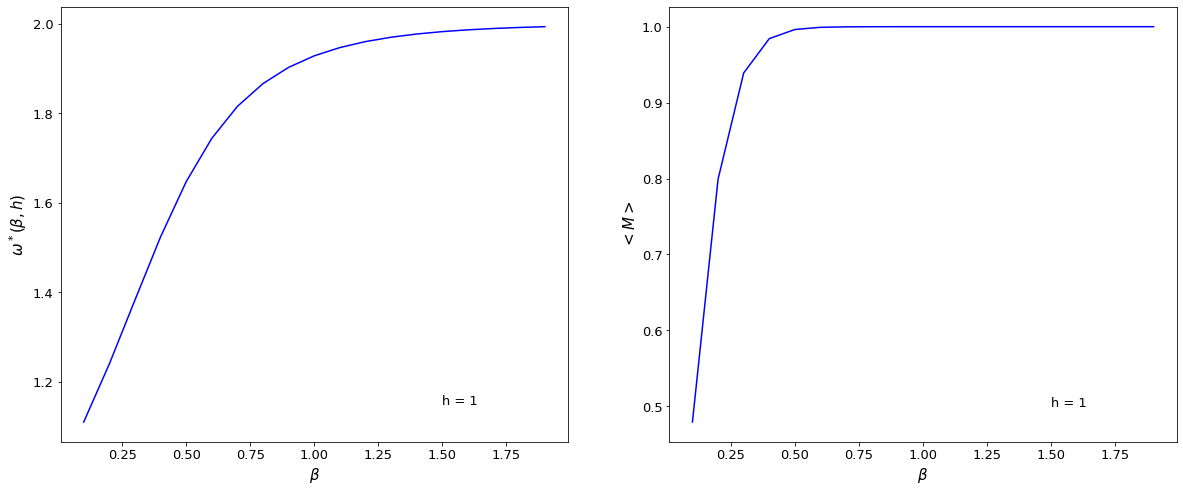

In [ ]:
beta_list = np.arange(0.1 , 2 , 0.1)
h = 1
w_star = []
for beta in beta_list:
  list_w_i = []
  w_star.append(w_i(N))
  

fig, ax = plt.subplots(1,2 , figsize=(20,8))

ax[0].plot(beta_list , w_star , color='blue')
ax[0].set_ylabel('$\u03C9^*(\u03B2,h)$')
ax[0].set_xlabel('$\u03B2$')
ax[0].text(1.5,1.15,'h = '+str(h),fontsize = 13)

def mean_Mag(w_s,b):
    f1 = (  ( np.exp(-2*b) - 1) / (np.exp(-2*b*w_s)+1) ) + 1
    f2 = (  ( np.exp(2*b) - 1) / (np.exp(-2*b*w_s)+1) ) + 1
    f3 = np.exp(-2*b*(h+2))
    mean_m = (1 - f3 * (f1/f2)**2) / (1 + f3 * (f1/f2)**2)
    return mean_m

Mean_Magnet = []
h = 1
for i in range(len(beta_list)):
  Mean_Magnet.append(mean_Mag(w_star[i],beta_list[i]))

ax[1].plot(beta_list , Mean_Magnet , color ='blue')
ax[1].set_ylabel('$<M>$')
ax[1].set_xlabel('$\u03B2$')
ax[1].text(1.5,0.5,'h = '+str(h),fontsize = 13)

#Exercise 2: Random matrix theory

##Part 1: Direct Diagonalization

###2.1: Random Regular Graphs of size $N = 2^{10}$ and $c = 3$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


mean value of the eigen values is  6.6353172956112874e-18


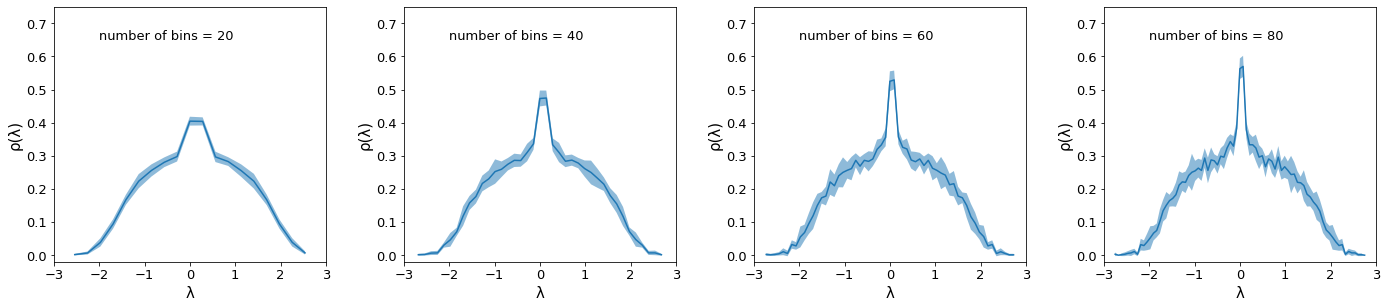

In [ ]:
N = pow(2,10)
c = 3
mean_J = 0
var_J = 1 / c
eig_val = []
for i in range(10):
    J = np.random.normal(mean_J, np.sqrt(var_J) , size=(N, N))
    symm_J = np.tril(J) + np.triu(J.T, 1) 
    G = nx.random_regular_graph(c, N)
    A = nx.adjacency_matrix(G)
    M = np.multiply(A.todense(),symm_J)
    np.fill_diagonal(M, 0)
    eig_val.append(np.linalg.eig(M)[0])

eig_val = np.array(eig_val)   
num_Bins_list = np.arange(20,100,20)
fig, ax = plt.subplots(1,4 , figsize=(20,5))
fig.tight_layout(pad=4.0)

min_bins = np.min(eig_val.flatten())
max_bins = np.max(eig_val.flatten())

rho_mean = []
rho_std = []
b_list= []
for num_b in num_Bins_list:
    delta_bin = (max_bins-min_bins)/num_b
    Bins = np.arange(min_bins,max_bins,delta_bin)
    b_list.append(Bins)
    eig_hist = np.array([np.histogram(eig,Bins)[0] for eig in eig_val ]) / (N* delta_bin)
    rho_mean.append(np.mean(eig_hist , axis = 0))
    rho_std.append(np.std(eig_hist , axis = 0))

rho_mean = np.array(rho_mean)    
rho_std = np.array(rho_std)
b_list = np.array(b_list)
for i in range(4):
    ax[i].plot(b_list[i][1:],rho_mean[i] )
    mean_spectral_density = np.mean(rho_mean[i] * ((b_list[i][1:] + b_list[i][:-1]) /2 ))
    ax[i].fill_between(b_list[i][1:], rho_mean[i] - rho_std[i] , rho_mean[i] +rho_std[i]  , alpha = 0.5)
    ax[i].set_ylabel('\u03C1(\u03BB)')
    ax[i].set_xlabel('\u03BB')
    ax[i].set_ylim(-0.02,0.75)
    ax[i].set_xlim(-3,3)
    ax[i].text(-2,0.65,'number of bins = '+str(len( b_list[i])) , fontsize = 13)


print('mean value of the eigen values is ',np.mean(eig_val))

###2.2 : Complete graphs of size $N = 2^{10}$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


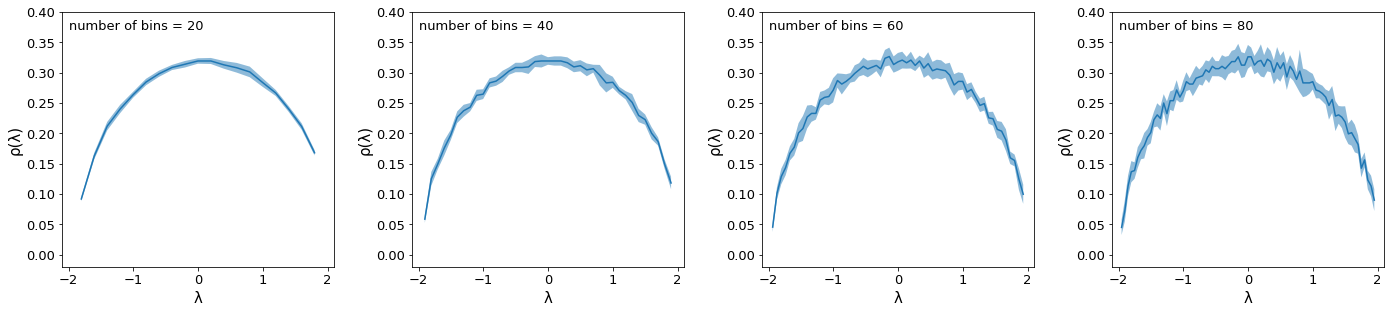

In [ ]:
N = pow(2,10)
c = N-1
mean_J = 0
var_J = 1 / c
eig_val = []
for i in range(10):
    J = np.random.normal(mean_J, np.sqrt(var_J) , size=(N, N))
    symm_J = np.tril(J) + np.triu(J.T, 1) 
    G = nx.complete_graph(N)
    A = nx.adjacency_matrix(G)
    M = np.multiply(A.todense(),symm_J)
    np.fill_diagonal(M, 0)
    eig_val.append(np.linalg.eig(M)[0])

eig_val = np.array(eig_val)  


num_Bins_list = np.arange(20,100,20)
fig, ax = plt.subplots(1,4 , figsize=(20,5))
fig.tight_layout(pad=4.0)

min_bins = np.min(eig_val.flatten())
max_bins = np.max(eig_val.flatten())

rho_mean = []
rho_std = []
b_list= []
for num_b in num_Bins_list:
    delta_bin = (max_bins-min_bins)/num_b
    Bins = np.arange(min_bins,max_bins,delta_bin)
    b_list.append(Bins)
    eig_hist = np.array([np.histogram(eig,Bins)[0] for eig in eig_val ]) / (N* delta_bin)
    rho_mean.append(np.mean(eig_hist , axis = 0))
    rho_std.append(np.std(eig_hist , axis = 0))

rho_mean = np.array(rho_mean)    
rho_std = np.array(rho_std)
rho_mean = np.array(rho_mean)    
rho_std = np.array(rho_std)
b_list = np.array(b_list)
for i in range(4):
    ax[i].plot(b_list[i][1:],rho_mean[i] )
    mean_spectral_density = np.mean(rho_mean[i] * ((b_list[i][1:] + b_list[i][:-1]) /2 ))
    ax[i].fill_between(b_list[i][1:], rho_mean[i] - rho_std[i] , rho_mean[i] +rho_std[i]  , alpha = 0.5)
    ax[i].set_ylabel('\u03C1(\u03BB)')
    ax[i].set_xlabel('\u03BB')
    ax[i].set_ylim(-0.02,0.4)
    ax[i].set_xlim(-2.1,2.1)
    ax[i].text(-2,0.37,'number of bins = '+str(len( b_list[i]))  , fontsize = 13)




###2.3:  Wigner semicircle law and fully connected networks at limit $N \rightarrow \infty$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


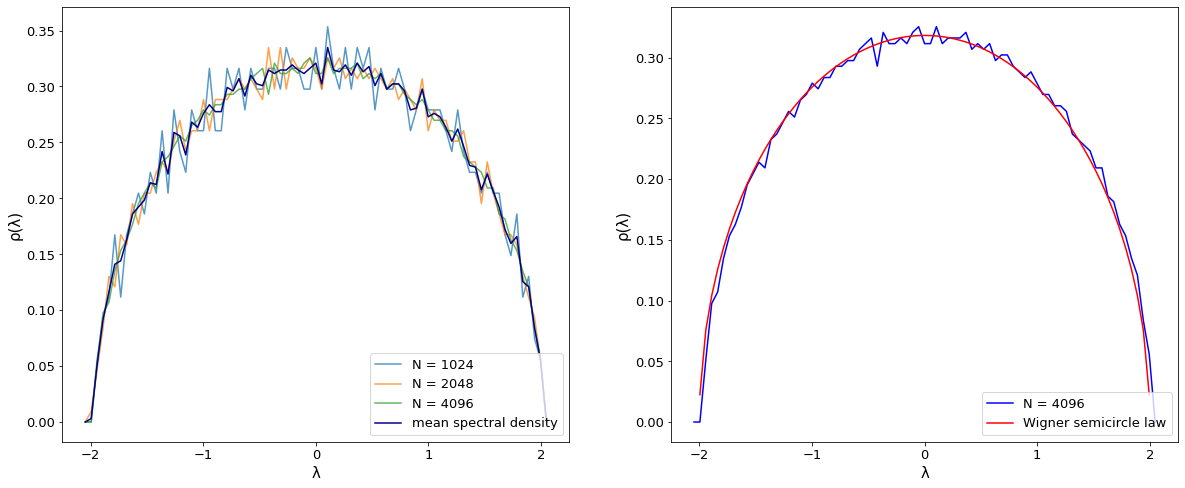

In [ ]:
N_list = [2**10,2**11,2**12]
eig_val = []
eig_hist = []
num_b = 80
min_bins = -2.1
max_bins = 2.1
delta_bin = (max_bins-min_bins)/num_b
Bins = np.arange(min_bins,max_bins,delta_bin)
for N in N_list:
    c = N-1
    mean_J = 0
    var_J = 1 / c
    J = np.random.normal(mean_J, np.sqrt(var_J) , size=(N, N))
    symm_J = np.tril(J) + np.triu(J.T, 1) 
    np.fill_diagonal(symm_J ,0 )
    eig_val.append(np.linalg.eig(symm_J)[0])
    eig_hist.append(np.histogram(eig_val[-1],Bins)[0] / (N* delta_bin))


rho_mean = np.mean(eig_hist , axis = 0)
rho_std = np.std(eig_hist , axis = 0)

fig, ax = plt.subplots(1,2 , figsize=(20,8))
for i in range(len(N_list)):
    ax[0].plot(Bins[1:],eig_hist[i] , alpha = 0.75 , label = 'N = '+str(N_list[i]) )
ax[0].plot(Bins[1:] , rho_mean , c ='darkblue', label='mean spectral density' )#,marker = '<' , s=75  , c = 'black' , label='mean spectral density')

ax[0].set_ylabel('\u03C1(\u03BB)')
ax[0].set_xlabel('\u03BB')
ax[0].legend(loc='lower right')


ax[1].plot(Bins[1:],eig_hist[-1] , label='N = '+str(N_list[-1]) , color='blue')



L_list = np.arange(-2,2.001,0.1)
L_list[-1] = 2
Wigner = np.array([np.sqrt(4-(L**2))/(2*np.pi) for L in Bins])
ax[1].plot(Bins , Wigner,label='Wigner semicircle law', color = 'red')

ax[1].set_ylabel('\u03C1(\u03BB)')
ax[1].set_xlabel('\u03BB')
ax[1].legend(loc='lower right')

###2.4: Wigner semicircle law and universality classes

512
1024
2048
4096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


(-2.1, 2.1)

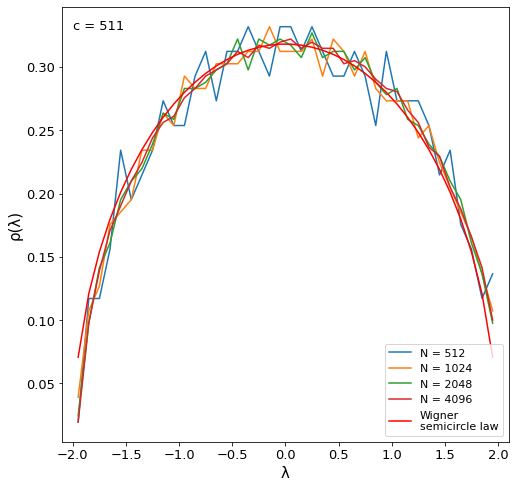

In [ ]:
N_list = [2**9,2**10,2**11,2**12]
c = 511
mean_J = 0
var_J = 1 / c
rho_mean = []

for k in range(len(N_list)):
    # print(N_list[k])
    J = np.random.normal(mean_J, np.sqrt(var_J) , size=(N_list[k], N_list[k]))
    symm_J = np.tril(J) + np.triu(J.T, 1) 
    G = nx.random_regular_graph(c, N_list[k])
    A = nx.adjacency_matrix(G)
    M = np.multiply(A.todense(),symm_J)
    np.fill_diagonal(M, 0)
    eig_val = np.linalg.eig(M)[0]

    eig_val = np.array(eig_val)
    delta_bin = 0.1
    Bins = np.arange(-2.05,2.05,delta_bin)
    eig_hist = np.histogram( eig_val,Bins)[0] / (N_list[k]* delta_bin)
    rho_mean.append(eig_hist)

fig, ax = plt.subplots(1,1 , figsize=(8,8))

for i in range(len(N_list)):    
    ax.plot(Bins[1:],rho_mean[i] , label='N = '+str(N_list[i]))



L_list = np.arange(-2,2.001,0.1)
L_list[-1] = 2
Wigner = np.array([np.sqrt(4-(L**2))/(2*np.pi) for L in Bins])
ax.plot(Bins , Wigner,label='Wigner\nsemicircle law', color = 'red')

ax.set_ylabel('\u03C1(\u03BB)')
ax.set_xlabel('\u03BB')
ax.legend(loc='lower right',fontsize = 11)
ax.text(-2,0.33,'c = '+ str(c),fontsize = 13)
ax.set_xlim(-2.1,2.1)

##Part 2: Cavity method

In [ ]:
N = pow(2,11)
c = 3
mean_J = 0
var_J = 1 / c

J = np.random.normal(mean_J, np.sqrt(var_J) , size=(N, N))
symm_J = np.tril(J) + np.triu(J.T, 1) 
graph = nx.random_regular_graph(c, N)
A = nx.adjacency_matrix(graph)
Mat = np.multiply(A.todense(),symm_J)
np.fill_diagonal(Mat, 0)
Mat = np.array(Mat)
eig_val = np.linalg.eig(Mat)[0]

###2.6: Resolvent method vs. Direct Diagonalization

####Resolvent method

In [ ]:
def resolvent_method(M , Lambda,eps = 0.001,N = 2**11,complex_i = 1j):
  G_inv =  ((Lambda - complex_i * eps) * np.identity(N)) - M
  G = np.linalg.inv(G_inv)
  trace_img = (1/(N*np.pi)) * np.trace(G.imag)
  return(trace_img)

Lambda_list = np.arange(-4,4,0.1)
epsilon_list = [0.0001,0.001,0.01,0.1]
P_L = []
for epsilon in epsilon_list:
  # print(epsilon)
  P_L.append([resolvent_method(Mat,l , epsilon) for l in Lambda_list])

0.0001
0.001
0.01
0.1


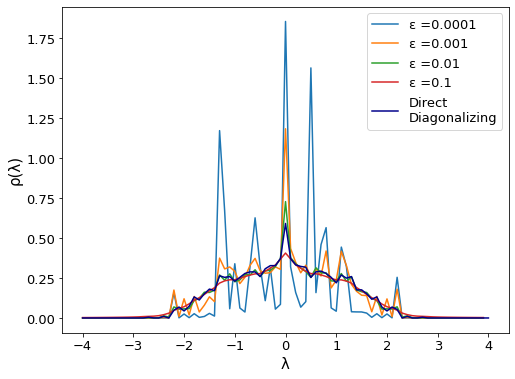

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))

for i in range(len(epsilon_list)):
  ax.plot(Lambda_list,P_L[i] , label ='\u03B5 ='+str(epsilon_list[i]))


Bins = np.arange(-4.05,4.15,0.1)
l_corrected = (Bins[1:]+Bins[:-1])/2
eig_hist = np.histogram(eig_val,Bins)[0]/ (N* 0.1)
ax.plot(l_corrected , eig_hist , label = 'Direct\nDiagonalizing' , color = 'darkblue')


ax.set_ylabel('\u03C1(\u03BB)')
ax.set_xlabel('\u03BB')
ax.legend(loc='upper right')

####Single instance cavity equations algorithm

In [ ]:
def Cavity_precisions(M, Lambda,eps = 0.001 , W = 0 ,T = 10000,tolerance = pow(10,-3),complex_i = 1j):
  w = np.multiply(M , np.random.normal(0,1 , size = np.shape(M) )) * complex_i
  E = np.random.uniform(-W/2,W/2 , size = N)
  for t in range(T): 
    # if t %1000 == 0:
      # print(t)
    delta = 0
    w_initial = w.copy()
    for j in range(N):
      connections = np.where(M[j] != 0)[0].tolist()
      for k in connections:
          M_kl = np.where(M[k] != 0)[0].tolist()
          M_kl.remove(j)
          w[j][k] = complex_i * (Lambda - eps* complex_i - E[k]) + sum([np.array(M[k][l])**2 /w[k][l]  for l in M_kl  ] )
    delta = np.max(abs(w_initial - w))
    if delta <= tolerance: 
      marginal = np.zeros(N)  * complex_i
      for x in range(N):      
          neighbors = np.where(M[x] != 0)[0].tolist()
          marginal[x] = complex_i * (Lambda - eps* complex_i - E[x]) + sum([np.array(M[k][x])**2 /w[x][k]  for k in neighbors  ] )
      # print('oho')
      return  marginal 
  print('Not Converged')
  return 'Not Converged!'



In [ ]:
complex_i = 1j
p_lambda = []
Lambda_list = np.arange(-4,4,0.1)

epsilon_list = [0.0001,0.001,0.01,0.1]
for epsilon in epsilon_list:
  # print(epsilon)
  p_lambda.append([])
  for LAMBDA in Lambda_list:
    # print("L = ", LAMBDA)
    precisions = Cavity_precisions(Mat,LAMBDA ,eps = epsilon)
    p_lambda[-1].append(np.sum((complex_i / precisions).imag)/(np.pi * N))


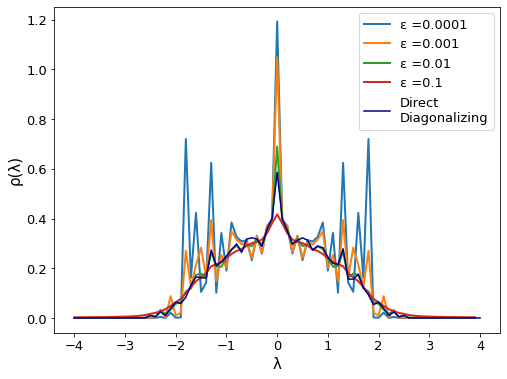

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))

for i in range(len(epsilon_list)):
  ax.plot(Lambda_list,p_lambda[i] , label ='\u03B5 ='+str(epsilon_list[i]),linewidth=2)

delta_bin = 0.1
Bins = np.arange(-4.05,4.15,delta_bin)
l_corrected = (Bins[1:]+Bins[:-1])/2
eig_hist = np.histogram(eig_val,Bins)[0]/ (N* delta_bin)
ax.plot(l_corrected , eig_hist , label = 'Direct\nDiagonalizing' , color = 'darkblue')



ax.set_ylabel('\u03C1(\u03BB)')
ax.set_xlabel('\u03BB')
ax.legend()

#Exercise 3: Anderson model on an RRG

##3.2: Single instance cavity method

In [ ]:
def Cavity_precisions(M, Lambda,eps = 0.001 , W = 0 ,T = 10000,tolerance = pow(10,-3),complex_i = 1j):
  initial_w = np.multiply(M , np.random.normal(0,1 , size = np.shape(M) ))
  w = np.multiply(initial_w , complex_i )
  E = np.random.uniform(-W/2,W/2 , size = N)
  for t in range(T): 
    delta = 0
    w_initial = w.copy()
    for j in range(N):
      connections = np.where(M[j] != 0)[0].tolist()
      for k in connections:
          M_kl = np.where(M[k] != 0)[0].tolist()
          M_kl.remove(j)
          w[j][k] = complex_i * (Lambda - eps* complex_i - E[k]) + sum([np.array(M[k][l])**2 /w[k][l]  for l in M_kl  ] )
    delta = np.max(abs(w_initial - w))
    if delta <= tolerance: 
      marginal = np.zeros(N)  * complex_i
      for x in range(N):      
          neighbors = np.where(M[x] != 0)[0].tolist()
          marginal[x] = complex_i * (Lambda - eps* complex_i - E[x]) + sum([np.array(M[k][x])**2 /w[x][k]  for k in neighbors  ] )
      return  marginal 
  print('Not Converged')
  return 'Not Converged!'


N = pow(2,10)
c = 3
disorder = 0.3


graph = nx.random_regular_graph(c, N)
A = nx.adjacency_matrix(graph)
W_diag = np.random.uniform(-disorder/2,disorder/2 , N)
Mat = -A.todense()
np.fill_diagonal(Mat, W_diag)
Mat = np.array(Mat)  
eig_val = np.linalg.eig(Mat)[0]

80
0
10
20
30
40
50
60
70


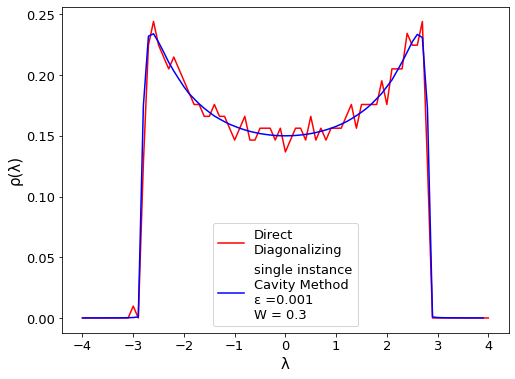

In [ ]:
complex_i = 1j
Lambda_list = np.arange(-4,4,0.1)

epsilon_SI = 0.001
p_lambda_SI = []
for LAMBDA in Lambda_list:

    precisions = Cavity_precisions(Mat,LAMBDA ,eps = epsilon_SI , W = 0.3)
    p_lambda_SI.append(np.sum((complex_i / precisions).imag)/(np.pi * N))

fig, ax = plt.subplots(1,1 , figsize=(8,6))

delta_bin = 0.1
Bins = np.arange(-4.05,4.15,delta_bin)
l_corrected = (Bins[1:]+Bins[:-1])/2
eig_hist = np.histogram(eig_val,Bins)[0]/ (N* delta_bin)
ax.plot(l_corrected , eig_hist , label = 'Direct\nDiagonalizing' , color = 'red')


ax.plot(Lambda_list,p_lambda_SI , color='blue',label ='single instance\nCavity Method \n\u03B5 ='+str(epsilon_SI) +'\nW = 0.3')



ax.set_ylabel('\u03C1(\u03BB)')
ax.set_xlabel('\u03BB')
ax.legend()

##3.3: Population Dynamics algorithm

In [ ]:
def Population_dynamics(Lambda ,mean_plot = False ,eps = 0.001, Np = 1000  , W = 0.3,Tstar = pow(10,6), c = 3,complex_i = 1j):
  initial_P_w = np.random.uniform(0,1,size = Np ) + np.random.uniform(0,1,size = Np ) * complex_i
  mean_P_w = [np.mean(initial_P_w)]
  P_sum = np.zeros(Np)* complex_i
  for counter in range(Tstar):
    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)
    h = complex_i * (Lambda - eps* complex_i - E) + sum([1 /initial_P_w[i]  for i in random_elements[:-1]  ] )
    initial_P_w[random_elements[-1]] = h
    mean_P_w.append(np.mean(initial_P_w))

    if counter >= 900000:
      P_sum += initial_P_w

  initial_P_w = P_sum / (100000+0j)

  if mean_plot:
    return mean_P_w
  
  marginal_omega = np.zeros(100*Np)  * complex_i
  for sample in range(100*Np):
    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)
    H = complex_i * (Lambda - eps* complex_i - E) + sum([1 /initial_P_w[i]  for i in random_elements  ] )
    marginal_omega[sample] = H
    #### replacing a member in P_eq
    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)
    h = complex_i * (Lambda - eps* complex_i - E) + sum([1 /initial_P_w[i]  for i in random_elements[:-1]  ] )
    initial_P_w[random_elements[-1]] = h


  p_l = np.mean((complex_i / marginal_omega).imag)/(np.pi)
  return p_l 




/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3000.0, 103000.0)

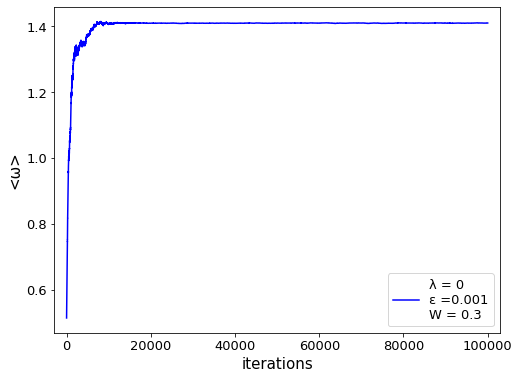

In [ ]:
LAMBDA = 0
epsilon_PD = 0.001
disorder = 0.3
equilibrium_test = Population_dynamics(Lambda = LAMBDA ,mean_plot = True ,eps = epsilon, Np = 1000 , c = 3 , W = disorder)
fig, ax = plt.subplots(1,1 , figsize=(8,6))
ax.plot(equilibrium_test[:100000] , label = '\u03BB = '+str(LAMBDA) + '\n\u03B5 ='+str(epsilon_PD)+'\nW = '+str(disorder),color='blue')
ax.set_ylabel('<\u03C9>')   
ax.set_xlabel('iterations')
ax.legend()
ax.set_xlim(-3000,103000)

In [ ]:
Lambda_list_PD = 2 * np.array(list(range(-20,20)))/10
p_lambda_PD = []
epsilon_PD = 0.001
o = 0
for LAMBDA in Lambda_list_PD:
  if o % 10 ==0 :
    print('counter:',o,'out of',len(Lambda_list_PD))
  o += 1
  p_lambda_PD.append(Population_dynamics(LAMBDA, eps = epsilon_PD))

counter: 0 out of 40
counter: 10 out of 40
counter: 20 out of 40
counter: 30 out of 40


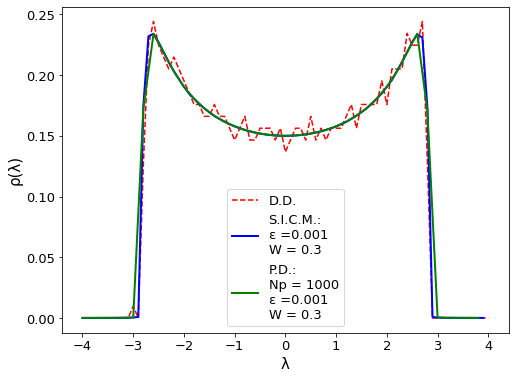

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))

ax.plot(l_corrected , eig_hist,'--' , label = 'D.D.' , color = 'red')
ax.plot(Lambda_list,p_lambda_SI , color='blue',label ='S.I.C.M.:\n\u03B5 ='+str(epsilon_SI) +'\nW = 0.3',linewidth = 2)
ax.plot(Lambda_list_PD,p_lambda_PD,color = 'green' ,label = 'P.D.:\nNp = 1000\n\u03B5 ='+str(epsilon_PD) +'\nW = 0.3',linewidth = 2)
ax.set_ylabel('\u03C1(\u03BB)')
ax.set_xlabel('\u03BB')
ax.legend()

##3.4: Distribution of the cavity variances

In [ ]:
def Cavity_variances(Lambda , eps = pow(10,-300), Np = 1000 , c = 3 , W = 0.3 , complex_i = 1j):
  initial_P_g = complex_i/(np.random.uniform(0,1,size = Np ) + np.random.uniform(0,1,size = Np ) * complex_i)
  mean_P_g = [np.mean(initial_P_g.imag)]
  P_g_sum = np.zeros(Np) * complex_i
  Tstar = Np * pow(10,3)
  limit = Tstar * 0.9
  for iteration in range(Tstar):
    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)   
    h = complex_i * (Lambda - eps* complex_i - E) + sum([initial_P_g[i] / complex_i for i in random_elements[:-1]  ] )
    initial_P_g[random_elements[-1]] = complex_i/h
    mean_P_g.append(np.mean(initial_P_g.imag))
    if iteration >= limit:
      P_g_sum += initial_P_g

  initial_P_g = P_g_sum / ((Tstar - limit)+0j)

  g_w_typ = np.exp(np.mean(np.log(initial_P_g.imag)))
  
  return g_w_typ , initial_P_g

In [ ]:
LAMBDA = 0
Np_list = [1000, 5000 , 10000,15000]
Np_list = np.array(Np_list)
W_list = np.arange(10,21,1)
g_list = []
for NP in Np_list:
  print('Np = ',NP)
  g_list.append([])
  for disorder_W in W_list:
    print('disorder = ', disorder_W)
    g_list[-1].append(Cavity_variances(LAMBDA ,Np = NP , W = disorder_W)[0])

g_list = np.array(g_list)

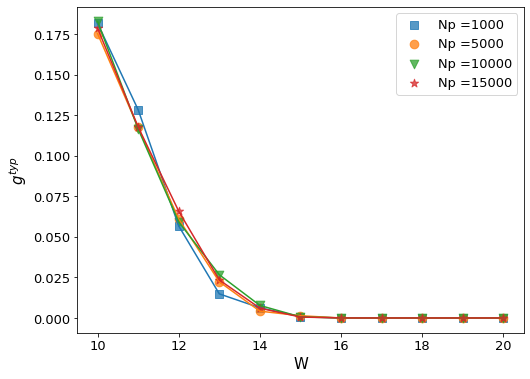

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))
markers = ["s" ,"o","v" ,"*"]
for i in range(len(Np_list)):
  ax.scatter(W_list , g_list[i], label = 'Np ='+str(Np_list[i]) , marker = markers[i] , s=75,alpha = 0.75)
  ax.plot(W_list,g_list[i])

ax.set_xlabel('W')
ax.set_ylabel('$g^{typ}$')
ax.legend()


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


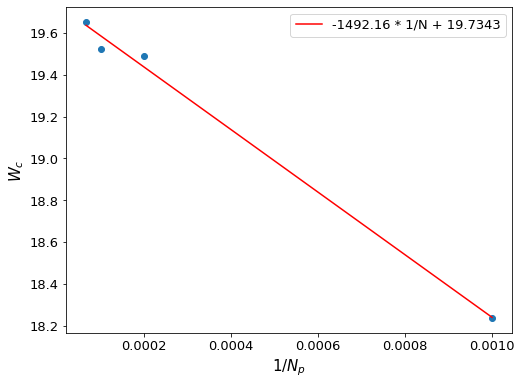

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))
Wc = [np.interp(200,-np.log(g_list[i]),W_list) for i in range(4)]
ax.scatter(1/Np_list , Wc)

def func(x,a,b,c):
  return a * 1/x + b

parameters, covariance = curve_fit(func, Np_list, Wc)

fit = [func(i,parameters[0],parameters[1],parameters[2])for i in Np_list]
ax.plot(1/Np_list,fit,color = 'red',label =str(round(parameters[0],2))+' * 1/N + '+str(round(parameters[1],4)))
ax.set_ylabel('$W_c$')
ax.set_xlabel('$1/N_p$')
ax.legend()

##3.5: Distribution of the marginal variances



In [ ]:
def marginal_variances(Lambda = 0 ,eps = pow(10,-6), Np = 10000 , c = 3 , W =10,complex_i = 1j ): 
  initial_P_g = complex_i/(np.random.uniform(0,1,size = Np ) + np.random.uniform(0,1,size = Np ) * complex_i)
  mean_P_g = [np.mean(initial_P_g.imag)]
  P_g_sum = np.zeros(Np) * complex_i
  Tstar = Np * pow(10,3)
  limit = Tstar * 0.9
  for iteration in range(Tstar):
    if iteration % (Tstar*0.1) ==0:
      print(iteration)

    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)   
    h = complex_i * (Lambda - eps* complex_i - E) + sum([initial_P_g[i] / complex_i for i in random_elements[:-1]  ] )
    initial_P_g[random_elements[-1]] = complex_i/h
    mean_P_g.append(np.mean(initial_P_g.imag))
    if iteration >= limit:
      P_g_sum += initial_P_g
  
  P_g = P_g_sum / ((Tstar - limit)+0j)  
  ####finding G from equilibrated
  marginal_G = np.zeros(100*Np)  * complex_i
  for sample in range(100*Np):
    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)
    h = complex_i * (Lambda - eps* complex_i - E) + sum([P_g[i] / complex_i  for i in random_elements  ] )
    marginal_G[sample] = complex_i/h
    #### replacing a member in P_eq    
    random_elements = np.random.randint(0,Np , size = c)
    E = np.random.uniform(-W/2 ,W/2)   
    h = complex_i * (Lambda - eps* complex_i - E) + sum([P_g[i] / complex_i for i in random_elements[:-1]  ] )
    P_g[random_elements[-1]] = complex_i/h


  G_typ = np.exp(np.mean(np.log(marginal_G.imag)))
  spectral_density = np.mean(marginal_G.imag)/np.pi

  return marginal_G , spectral_density, G_typ

In [ ]:
unlocalized = marginal_variances(Lambda= 0  , W=10 )
localized = marginal_variances(Lambda= 0  , W =20 )

Text(5, 0.015, 'λ = 0\nNp = 10000\nε = $10^{-6}$')

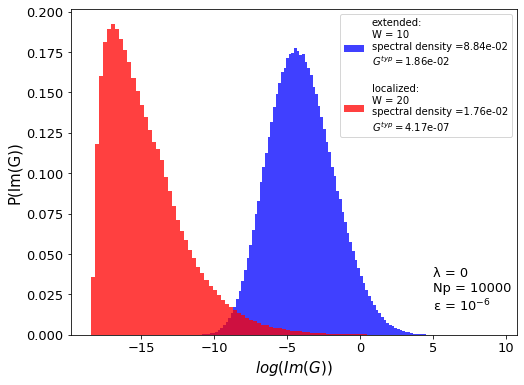

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))
ax.hist(np.log(unlocalized[0].imag),bins = 100, density = True,color='blue',alpha=0.75 ,label='extended:\nW = 10\nspectral density ='+"{:.2e}".format(unlocalized[1])+'\n$G^{typ} = $'+"{:.2e}\n".format(unlocalized[2]))
ax.hist(np.log(localized[0].imag),bins = 100 ,density = True,color='red',alpha = 0.75, label='localized:\nW = 20\nspectral density ='+"{:.2e}".format(localized[1])+'\n$G^{typ} = $'+"{:.2e}".format(localized[2]))
ax.legend(fontsize = 10)
ax.set_xlabel('$log(Im(G))$')
ax.set_ylabel('P(Im(G))')
ax.text(5,0.015,'\u03BB = 0\nNp = 10000\n\u03B5 = $10^{-6}$',fontsize = 13)


##3.6: Inverse Participation Ratio(IPR) and localization

In [ ]:
def RRG(N_size , W , c = 3):

  graph = nx.random_regular_graph(c, N_size)
  A = nx.adjacency_matrix(graph)
  W_diag = np.random.uniform(-W/2,W/2 , N_size)
  M = -A.todense()
  np.fill_diagonal(M, W_diag)
  M = np.array(M)  
  eig_val = np.linalg.eig(M)[0]
  value, vector = np.linalg.eig(M)
  
  return value, vector

def IPR(v):
  return (len(v)*np.sum(v**4))/(np.sum(v**2))**2

In [ ]:
N_list = [2**9,2**10 , 2**11 , 2**12]
disorder_list = list(range(5,21))

I2_list = np.zeros((len(N_list),len(disorder_list)))
I2_list_var = np.zeros((len(N_list),len(disorder_list)))
for k in range(len(disorder_list)):
  disorder = disorder_list[k]
  print('disorder = ', disorder)
  for j in range(len(N_list)):
    N = N_list[j]
    print('N : ',N)
    I2 = []
    for iteration in range(10):
      print('iteration : ', iteration)
      E_val , E_vec = RRG(N_size = N , W = disorder )
      interval = np.where(abs(E_val) < 0.05)[0]
      for i in interval:
        I2.append(IPR(np.array(E_vec[i]))) 
    I2_list[j][k] = np.mean(I2) 
    I2_list_var[j][k] = np.std(I2)

I2_list = np.array(I2_list)
I2_list_var = np.array(I2_list_var)

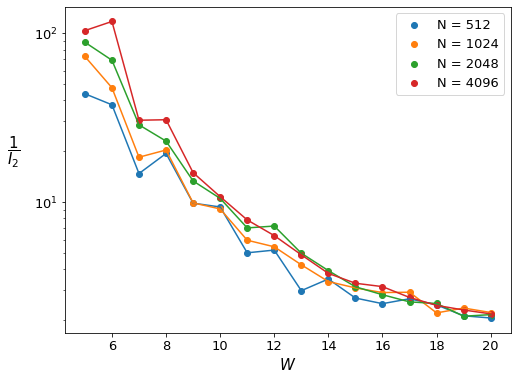

In [152]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))

for i in range(len(I2_list)):
  ax.scatter(disorder_list, 1/(I2_list[i]/N_list[i]), label='N = '+str(N_list[i]))
  ax.plot(disorder_list, 1/(I2_list[i]/N_list[i]) )
ax.set_xlabel('$W$')
ax.set_ylabel('$\dfrac{1}{ I_2} $' , rotation= 'horizontal',labelpad=20)
ax.legend(loc='upper right')
ax.set_yscale('log')


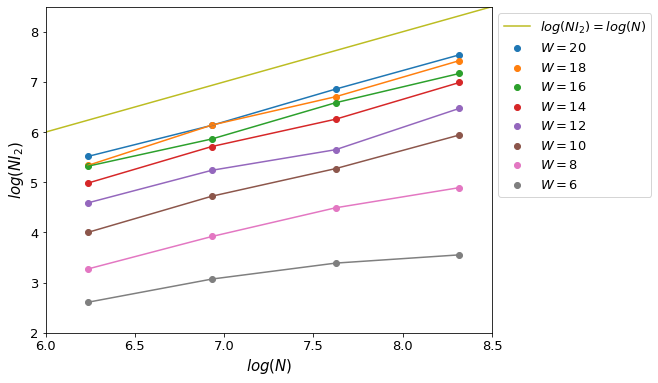

In [153]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))

for i in range(1,int(len(I2_list.T)/2)+1):
  ax.scatter(np.log(N_list), np.log(I2_list.T[-2*i+1]) , label='$W = $'+str(disorder_list[-2*i+1]))
  ax.plot(np.log(N_list), np.log(I2_list.T[-2*i+1] ))

ax.plot(range(10),range(10) , label = '$log(NI_2) = log(N)$')
ax.set_xlim(6,8.5)
ax.set_ylim(2,8.5)

ax.set_xlabel('$log(N)$')
ax.set_ylabel('$log(NI_2)$')
ax.legend(bbox_to_anchor=(1,1))

38.716527924488894


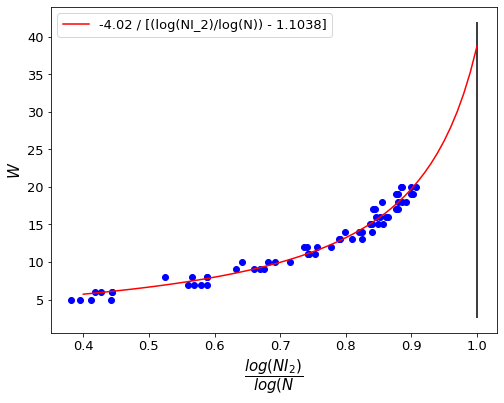

In [177]:
fig, ax = plt.subplots(1,1 , figsize=(8,6))

ratio = [np.log(I2_list.T[i])/np.log(N_list) for i in range(len(I2_list.T))]
ratio = np.array(ratio)
for j in range(len(ratio.T)):
  ax.scatter(ratio.T[j],disorder_list,c='blue' )

def func(x,a,b):
  return a /(x-b)
W_disorder = []
for i in range(4):
  W_disorder = W_disorder + disorder_list
parameters, covariance = curve_fit(func, ratio.T.flatten(),W_disorder)


fit = [func(i,parameters[0],parameters[1])for i in np.arange(0.4,1.001,0.01)]
ax.plot(np.arange(0.4,1.001,0.01),fit,color = 'red',label ='{0} / [(log(NI_2)/log(N)) - {1}]'.format(str(round(parameters[0],2)), str(round(parameters[1],4))))
ax.set_ylabel('$W$')
ax.set_xlabel('$\dfrac{log(NI_2)}{log(N}$')
ax.vlines(1,2.5,42)
ax.legend(loc="upper left")

print(parameters[0]/(1-parameters[1]))
